# Pràctica 8: Recommeder Systems

#### NOM:
#### NIU: 

## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent **dijous abans de les 23:59**, és a dir, quasibé tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, **sense ZIP**, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta pràctica tractará els següents temes:

* A. Recomenadors No Personalitzats **(20%)**
* B. Recomenadors k-NN **(30%)**
* C. Recomenadors SVD **(50%)**

## Datasets

#### MovieLens-Latest-Small

Farem ús de la base de dades de qualificacions de pel·lícules de [MovieLens](https://grouplens.org/datasets/movielens/). Existeixen varies mides del dataset. Per aprendre'n com funciona la base dels recomenadors, farem servir la versió petita. **Us la heu de descarregar**:

- [Small](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip): 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. (Last updated 9/2018.). [Aqui](https://paperswithcode.com/sota/collaborative-filtering-on-movielens-100k) podeu veure els darrers articles publicats al respecte.

#### MovieLens-Latest
La última versió d'aquesta base de dades, **que no farem servir**, però posem com a referència
- [Full](http://files.grouplens.org/datasets/movielens/ml-latest.zip): 27,000,000 ratings and 1,100,000 tag applications applied to 58,000 movies by 280,000 users. Includes tag genome data with 14 million relevance scores across 1,100 tags. Last updated 9/2018.

#### Netflix Grand-Prize
Teniu una explicació del que va passar a la [wikipedia](https://en.wikipedia.org/wiki/Netflix_Prize). Les dades d'entrenament contenien 100,480,507 ratings that 480,189 users gave to 17,770 movies.

- [challenge 2006-2009](https://www.kaggle.com/netflix-inc/netflix-prize-data)

Com a orientació, les dades actuals de Netflix és de més de 150,000,000 d'usuaris i varis milers películes i sèries de televisió.



## Llibreria

Existeixen moltes llibreries i codis per a realitzar sistemes recomenadors. A continuació us en poso el que farem servir:

#### LensKit Python
- [LKPy](https://github.com/lenskit/lkpy)

Per instal·lar la versió actual, podeu fer servir Anaconda:

`conda install -c lenskit lenskit`

O amb pip:

`pip install lenskit`

#### Altres llibreries interessants
- [Surprise](http://surpriselib.com/) 4.5k stars a github. Molt popular.
- A la web, [paperswithcode](https://paperswithcode.com/), teniu codi actual utilitzat pels darreres grups de recerca en articles científics. Hi trobareu un recopilatori de repositoris i trobareu resumit un ranking dels mètodes per tal d'ajudar a la recerca. En el cas de [recomenadors](https://paperswithcode.com/task/recommendation-systems), podeu veure quina és la tendència actual.





## Introducció

En aquesta pràctica aprendrem sobre sistemes recomenadors, com són les dades, quins mètodes existeixen per a predir qualificacions (ratings) a pel·lícules, fer recomenacions basat en les qualificacions, i veure les diferents formes per evaluar-ho.

Actualment, són sistemes molt utilitzats i gairebé podriem dir que esencials, en diferents sectors online (e.g. YouTube videos, Netflix shows, Amazon products).

Podem veure-hi dues tendències:
<img src="https://miro.medium.com/max/998/1*O_GU8xLVlFx8WweIzKNCNw.png" width="500px">
* **Content filtering**: les recomenacions provenen de descriure el contingut dels items i llavors recomenar items similars.
* **Collaborative filtering**: les recomenacions provenen de l'ús dels items pels clients, és a dir, trobar relacions entre quins items agraden a quins usuaris i recomenar aquells llavors.

També es poden distingir clarament dos tipus de formes d'extreure les qualificacions:
* **Explicit rating**: els usuaris posen nota o qualifiquen les pel·lícules segons el seu gust.
* **Implicit rating**: les qualificacions provenen de l'ús de l'usuari, sense que aquest hagi d'especificar si li agrada o no. És més fàcil d'aconseguir, però no es té un grau de certesa tan gran com en el cas anterior. Un exemple són els clicks en una botiga online, on es solen recomenar nous items segons el nostre historial de visualitzacions.


Per tal de fer-ho més interactiu, us comparteixo un fitxer amb algunes qualificacions meves: `pep-movie-ratings.csv`. El que intentarem és trobar una pel·lícula a veure que ens pugui agradar tan a vosaltres com a mi, per això, el primer que haureu de fer és **omplir la vostra pròpia llista de qualificacions** omplint el fitxe `my-movie-ratings.csv`. 

Els diferents apartats farán ús de diferents tipus de recomenacions:

* El primer apartat aplicarem recomenacions no personalitzades, és a dir, mètodes que no tinguin en compte el que ens agradi a nosaltres, sinó recomenacions genèriques basades amb el que li ha agradat als altres usuaris. Ens servirà com a baseline per si no es coneix res d'algun usuari (per exemple al principi quan es donen d'alta, o veure tendències globals)
  També aprendrem a com evaluar sistemes que tinguin en compte el ranking
* En el següent apartat, aplicarem mètodes de recomenació basats en k-NN. Hi aplicarem mètodes de filtratge colaboratiu User-User i Item-Item.
  <img src="https://miro.medium.com/max/1400/1*QvhetbRjCr1vryTch_2HZQ.jpeg" width="500">
  Aquí aplicarem mètodes que requereixin un aprenentatge sobre dades dels clients als que volem predir.
* Finalment, provarem mètodes basats en la factorització de matrius (SVD). A partir d'aquests, s'han desenvolupat la majories dels mètodes més utilitzats en la actualitat.
  <img src="https://miro.medium.com/max/5130/1*b4M7o7W8bfRRxdMxtFoVBQ.png" width="600">

Començarem descarregant el dataset, descomprimint-lo i [llegint les dades del dataset](https://lkpy.readthedocs.io/en/stable/datasets.html) (el contingut ha de trobar-se a *./ml-latest-small/*)

In [2]:
import lenskit.datasets as ds
import pandas as pd

data = ds.MovieLens('ml-latest-small/')
print("Successfully installed dataset.")

És important entendre com s’estructura un conjunt de dades i assegurar-se que el conjunt de dades s’importa correctament. Imprimim algunes files de les dades de classificació.

Com veieu, MovieLens emmagatzema el número d'identificació d'un usuari (a la primera fila, poques files semblen ser totes les valoracions de l'usuari 1),
 l'identificador de l'element (en aquest cas, cada identificador és una pel·lícula diferent), la qualificació que l'usuari ha donat a aquest element ,
 i un segell de temps per a quan es va deixar la qualificació.

In [3]:
rows_to_show = 10   # <-- Try changing this number to see more rows of data
data.ratings.timestamp = pd.to_datetime(data.ratings.timestamp, unit='s')
data.tags.timestamp = pd.to_datetime(data.tags.timestamp, unit='s')

# display(data.ratings)  # user - item - rating - timestamp
# display(data.movies)   # item - title - genre
# display(data.tags)     # user - item - tag - timestamp
# display(data.links)    # item - id of imdb - id of tmdb

Un aspecte important dels conjunts de dades del sistema de recomanacions és com gestionen les dades que falten.
Els sistemes de recomanació solen tenir MOLTES de dades que falten, perquè la majoria d’usuaris només valoren algunes pel·lícules i la majoria de pel·lícules només reben valoracions d’uns quants usuaris.

Per exemple, podem veure que l’usuari núm. 1 va proporcionar una qualificació de 4.0 a l’element número 1 i
que va proporcionar una qualificació de 4.0 a l’element núm. 3. Però no hi ha cap valoració per a l’element número 2,
cosa que significa que l’usuari núm. 1 mai no l’ha puntuat. És útil saber que aquest conjunt de dades no emmagatzema
cap element sense classificar, en lloc de, per exemple, emmagatzemar elements sense classificar com a 0 valoracions.

Però aquí tenim un altre petit problema: noms com el item 1 i el item 2 no són molt descriptius, de manera que no podem saber quines són aquestes pel·lícules. Afortunadament, MovieLens també té una taula de dades anomenada "movies" que inclou informació sobre títols i gèneres. Podem obtenir una visió més significativa d’aquestes dades unint els dos fitxers de dades.

In [4]:
joined_data = data.ratings.join(data.movies[['title', 'genres']], on='item')
display(joined_data)

,user,item,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi


Ara podem veure els títols i els gèneres de cada ítem.


## A. Recomenadors No Personalitzats (20%)

Ara que tenim puntuacions, creem conjunts genèrics de pel·lícules recomanades per a qualsevol espectador, sense conèixer els seus gustos.


A continuació posarem un exemple, a partir del que podeu crear altres búsquedes sobre el cataleg de pel·licules i ratings.

Algunes funcions de pandas que us poden ajudar:

* per ajuntar taules segons una columna, per exemple un id

  `.join(data.movies[['genres', 'title']], on='item')`


* per fer diferents tipus d'agregacions sobre les dades

  `.agg(count=('user', 'size'), rating=('rating', 'mean'), ..., title=('title', 'first'))`


* per convertir/codificar una columna de text en multiples columnes one-hot

 `.str.get_dummies('|')`


* per ordernar les files

  `.sort_values(by="rating")`
  
  
* per extreue el any del timestamp quan es va fer la qualificació
  
  `df['year_timestamp'] = df['timestamp'].dt.year`
  
* per extreure el any del titol (en cas que hi sigui)

  `df['year'] = df.Book.str.extract('\((\d{4})\)', expand=False)`
  

#### Preguntes

**Explica en cada una de les preguntes si el resultat es l'esperat o no**

1. Escull 5 pel·lícules al atzar i ordenales per puntuació
2. Mostra les 5 pel·lícules amb més puntuació
3. Mostra les 5 pel·lícules amb més quantitat de ratings
4. Mostra les 5 pel·lícules amb més puntuació amb almenys 50 ratings 
5. Mostra (any a any) les pel·lícules amb més puntuació
6. Mostra per categories, les 5 pel·lícules amb més puntuació i almenys 10 ratings
7. Inventa una altra forma de escollir pel·lícules.



#### Respostes

# 1. Escull 5 pel·lícules al atzar i ordenales per puntuació

In [401]:

###Abans d'aprender a fer servir agg ######
n = 5
titles = joined_data.groupby('title')
mean_tit = titles.mean()
count_tit = titles.count()
mean_tit = mean_tit.sample(frac=n/mean_tit.shape[0])
mean_tit['user'] = [count_tit[count_tit.index ==x]['user'].values[0] for x in mean_tit.index]
mean = mean_tit.sort_values('rating')
df = mean.drop('item',axis=1)
df.rename(columns={'user':'user_count'})

### Despres
titles = titles.agg({"user":'count',"rating":"mean"})
titles.sample(frac=n/titles.shape[0]).sort_values('rating').rename(columns={'user':'user_count','rating':'rating_mean'})

,user_count,rating_mean
title,,
Mental (2012),1,2.000000
Sahara (2005),7,3.071429
"Three Musketeers, The (2011)",3,3.166667
"Gleaners & I, The (Les glaneurs et la glaneuse) (2000)",1,4.000000
00 Schneider - Jagd auf Nihil Baxter (1994),1,4.500000


# 2.Mostra les 5 pel·lícules amb més puntuació

In [402]:
titles = joined_data.groupby('title')
mean_tit = titles.mean().sort_values('rating').iloc[-5:,:]
mean_tit.drop(['user','item'],axis=1)

,rating
title,
Winnie the Pooh and the Day of Concern (1972),5.0
Sorority House Massacre II (1990),5.0
My Love (2006),5.0
Winter in Prostokvashino (1984),5.0
Karlson Returns (1970),5.0


# 3. Mostra les 5 pel·lícules amb més quantitat de ratings

In [403]:
columns_renme = {'user':'user_count','rating':'rating_mean'}
titles = joined_data.groupby('title').agg({'user':'count','rating':'mean'}).rename(columns=columns_renme).sort_values('user_count').iloc[-5:,:]
titles

,user_count,rating_mean
title,,
"Matrix, The (1999)",278,4.192446
"Silence of the Lambs, The (1991)",279,4.161290
Pulp Fiction (1994),307,4.197068
"Shawshank Redemption, The (1994)",317,4.429022
Forrest Gump (1994),329,4.164134


# 4. Mostra les 5 pel·lícules amb més puntuació amb almenys 50 ratings

In [8]:
columns_renme = {'user':'user_count','rating':'rating_mean'}
titles = joined_data.groupby('title').agg({'user':'count','rating':'mean'}).rename(columns=columns_renme).sort_values('rating_mean')
(titles[titles['user_count']>50]).iloc[-5:,:]

,user_count,rating_mean
title,,
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),97,4.268041
Cool Hand Luke (1967),57,4.271930
Fight Club (1999),218,4.272936
"Godfather, The (1972)",192,4.289062
"Shawshank Redemption, The (1994)",317,4.429022


# 5. Mostra (any a any) les pel·lícules amb més puntuació

In [71]:
import numpy as np
columns_renme = {'user':'user_count','rating':'rating_mean'}
df = joined_data.groupby(['timestamp','title']).agg({'user':'count','rating':'mean'}).rename(columns=columns_renme)

y_ = np.vstack(df.index)[:,0]
years = np.unique(np.vstack(df.index)[:,0])
res = {'year':[],'title':[],'user_count':[],'rating_mean':[]}
for x in years:
    
    ################## Minim 5 vots ###############################
    df_mask = df['user_count'] > 5
    y__ = y_[df_mask]
    df_ = df[df_mask]
    ######### Els 2 millors de cada any ###################
    k = df_[y__ == x].sort_values('rating_mean').iloc[-2:,:]
    ###############################################################
    res['year'].append(x)
    res['title'].append(k.index[0][1])

    res['user_count'].append(k['user_count'][0])
    res['rating_mean'].append(k['rating_mean'][0])


pd.DataFrame(res)

,year,title,user_count,rating_mean
0,1996,Star Trek: First Contact (1996),10,4.400000
1,1996,In the Name of the Father (1993),8,4.500000
2,1997,"Silence of the Lambs, The (1991)",6,4.833333
3,1997,"Shawshank Redemption, The (1994)",7,5.000000
4,1998,Air Force One (1997),6,4.000000
5,1998,Titanic (1997),6,4.333333
6,1999,Schindler's List (1993),10,4.900000
7,1999,North by Northwest (1959),6,5.000000
8,2000,"Third Man, The (1949)",6,4.833333
9,2000,Dr. Strangelove or: How I Learned to Stop Worr...,8,5.000000


# 6. Mostra per categories, les 5 pel·lícules amb més puntuació i almenys 10 ratings

In [12]:

df = joined_data.groupby('title').agg({'user':'count','rating':'mean','genres':'first'}).rename(columns= {'user':'user_count','rating':'ratings_mean'})
mask = df['user_count'] > 10
df = df[mask]
mask2 = df['genres'].str.get_dummies('|')
res = {'genre':[],'title':[],'user_count':[],'ratings_mean':[]}
for column in mask2:
    actual_mask = mask2[column]
    val = df.where(actual_mask==1).dropna().sort_values('ratings_mean').iloc[-5:,:]
    for x in range(5):
        res['genre'].append(column)
        res['title'].append(val.index[x])
        res['user_count'].append(val.values[x][0])
        res['ratings_mean'].append(val.values[x][1])
pd.DataFrame(res)


,genre,title,user_count,ratings_mean
0,Action,"Dark Knight, The (2008)",149.0,4.238255
1,Action,"Outlaw Josey Wales, The (1976)",18.0,4.250000
2,Action,Fight Club (1999),218.0,4.272936
3,Action,Logan (2017),25.0,4.280000
4,Action,Once Upon a Time in the West (C'era una volta ...,18.0,4.305556
...,...,...,...,...
90,Western,Lone Star (1996),19.0,4.157895
91,Western,High Plains Drifter (1973),11.0,4.181818
92,Western,High Noon (1952),19.0,4.210526
93,Western,"Outlaw Josey Wales, The (1976)",18.0,4.250000


"Once Upon a Time in the West (C'era una volta il West) (1968)"

# 7. Inventa una altra forma de escollir pel·lícules.

M'he complciat una mica i no acaba de funcionar com hauria(tot i que funciona), s'ha decidit agafar una pel.licula com a referencia ( introdueixes part del titol o el títol sencer); codifica la informació en one hot i intenta buscar l'angle entre dos vectors; minimitzant aquest.

Dintre de les películes mes semblants en genere es busca el màxim en rating i es aquest el que s'escolleix.

In [389]:
import numpy as np
columns_renme = {'user':'user_count','rating':'rating_mean'}
titles = joined_data.groupby('title').agg({'user':'count','rating':'mean','genres':'first'}).rename(columns=columns_renme).sort_values('user_count')

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
#### Input Tittle
item = (input("INput a tittle or part of one: "))
### One hot encoding
classes = titles['genres'].str.get_dummies('|')
print(classes.index)
### Mask for the selected one
mask = np.array([item in x for x in classes.index])
v1 = classes[mask].values[0]
#Mask the rest
rest = classes.values[(mask*-1)+1]
angles = []
##Compute angles
for idx,vec in enumerate(rest):
    if item!=titles.index[idx]:
        angles.append((angle_between(vec,v1),idx,titles['rating_mean'][idx]))
## Angles to first rotation ( if angle >3.14 angle = angle/3.14)

angles = [[angle[0]/np.pi if angle[0]>np.pi else angles[0], angle[1],angle[2]] for angle in angles]
s= sorted(sorted(angles,key=lambda x:x[0][0])[:10],key=lambda x:x[-1])[-1]
classes.index[s[-2]]

Select an item to get neareness film by rating and categoriesMatrix
Index([''71 (2014)', 'Latter Days (2003)', 'Late Shift, The (1996)',
       'Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)',
       'Late Night Shopping (2001)', 'Late Marriage (Hatuna Meuheret) (2001)',
       'Last of the Dogmen (1995)', 'Last Year's Snow Was Falling (1983)',
       'Last Winter, The (2006)',
       'Last Wedding, The (Kivenpyörittäjän kylä) (1995)',
       ...
       'Schindler's List (1993)', 'Terminator 2: Judgment Day (1991)',
       'Braveheart (1995)', 'Jurassic Park (1993)',
       'Star Wars: Episode IV - A New Hope (1977)', 'Matrix, The (1999)',
       'Silence of the Lambs, The (1991)', 'Pulp Fiction (1994)',
       'Shawshank Redemption, The (1994)', 'Forrest Gump (1994)'],
      dtype='object', name='title', length=9719)


"Last Year's Snow Was Falling (1983)"

## B. Recomenadors k-NN (30%)

Fins ara hem trobat pel·lícules basades en cerques i aplicant filtres al contingut dels items, sense conèixer res dels nostres gustos o dels gustos de la resta d'usuaris que han qualificat una pel·lícula. En aquest apartat, buscarem pel·lícules basant-nos en el historial i les qualificacions dels usuaris, i amb aquest coneixement en traurem les pel·lícules relevants. Per aquest motiu se'n anomenen **filtres colaboratius**.

#### Models
Veurem els models que apareixen a la llibreria de LensKit, i utilitzarem els següents metodes:
* [**Bias**](https://lkpy.readthedocs.io/en/stable/bias.html): Tot i no tractar-se d'un mètode colaboratiu perse, ens pot servir com a baseline. El model bàsic prediu $s$ fent servir $s(u,i) = \mu + b_i + b_u$, on $\mu$ és el score promig de tot el dataset, $b_i$ és el residual promig del item $i$, i  $b_u$ és el bias de usuari, que es calcula com el residual promig de les prediccions del usuari $u$. A la documentació veureu clarament la notació. Veureu que conté un parametre de `damping` (amortiment) que es pot interpretar que està amortint els usuaris i elements amb poca informació cap a una mitjana global en lloc de permetre’ls prendre valors extrems basats en poques valoracions.

* [**ItemItem**](https://lkpy.readthedocs.io/en/stable/knn.html#module-lenskit.algorithms.item_knn): Aquest algorisme agrupa els items similars en funció de les valoracions que els usuaris han fet de elles. Inventat per Amazon el 1998. Està pensat per ser un mètode eficient quan les nostres dades contenen més usuaris que items. Amb més usuaris que elements, cada item sol tenir més puntuacions que cada usuari, de manera que la puntuació mitjana d’un article normalment no canvia tan ràpidament. Això condueix a distribucions de classificació més estables, de manera que no cal reconstruir-lo amb tanta freqüència.

* [**UserUser**](https://lkpy.readthedocs.io/en/stable/knn.html#module-lenskit.algorithms.user_knn): Aquest algorisme agrupa usuaris similars en funció de les seves valoracions de pel·lícules. Té parametres guiant com l'algoritme decideix si un grup concret d'usuaris hauria de ser agrupat mitjançant l'establiment d'una mida de veinatge mínima i màxima. Els clústers realment petits representen grups de persones que no són molt similars a molts altres. Així, mantenint la mida del clúster petit, veurem més recomanacions poc convencionals. Però si augmentem la mida mínima del clúster, probablement es donaran recomanacions més populars convencionalment. Els "millors" valors depenen del que vulguem que es comporti el sistema de recomanació AI. Volem sorprendre amb recomanacions que d’altra manera no sabrien? O busquen una expressió de qualitat més segura?





En aquest apartat farem aquests models explicats a classe per tal de buscar quines pel·lícules ens podràn agradar més a tots dos. Per això, farem ús dels fitxers: `pep-movie-ratings.csv` i `my-movie-ratings.csv` (que l'heu d'omplir amb N qualificacions de pel·lícules que hagueu vist).

In [22]:
from lenskit.algorithms import Recommender
from lenskit.algorithms.basic import Popular

num_recs = 10  #<---- This is the number of recommendations to generate. You can change this if you want to see more recommendations

popular = Popular() #These two numbers set the minimum (3) and maximum (15) number of neighbors to consider. These are considered "reasonable defaults," but you can experiment with others too
popular = Recommender.adapt(popular)
popular.fit(data.ratings)

print("Set up a Popular algorithm!")

Set up a Popular algorithm!


In [24]:
# Here, -1 tells it that it's not an existing user in the set, that we're giving new ratings, 
# while num_recs is how many recommendations it should generate
pep_recs_popular = popular.recommend(-1, 
                                     num_recs, 
                                     ratings=pd_pep_movie_ratings["ratings"]) 

In [25]:
print("POPULAR")
display(pep_recs_popular.join(data.movies[['genres', 'title']], on='item'))


POPULAR


,item,score,genres,title
0,318,317.0,Crime|Drama,"Shawshank Redemption, The (1994)"
1,593,279.0,Crime|Horror|Thriller,"Silence of the Lambs, The (1991)"
2,260,251.0,Action|Adventure|Sci-Fi,Star Wars: Episode IV - A New Hope (1977)
3,589,224.0,Action|Sci-Fi,Terminator 2: Judgment Day (1991)
4,1196,211.0,Action|Adventure|Sci-Fi,Star Wars: Episode V - The Empire Strikes Back...
5,2858,204.0,Drama|Romance,American Beauty (1999)
6,47,203.0,Mystery|Thriller,Seven (a.k.a. Se7en) (1995)
7,780,202.0,Action|Adventure|Sci-Fi|Thriller,Independence Day (a.k.a. ID4) (1996)
8,150,201.0,Adventure|Drama|IMAX,Apollo 13 (1995)
9,4993,198.0,Adventure|Fantasy,"Lord of the Rings: The Fellowship of the Ring,..."


#### Preguntes

1. Instancia i aprèn els models Populars, Bias, ItemItem-knn i UserUser-knn. Explica els parametres que tenen aquests models.
2. Llegeix la base de dades `pep-movie-ratings.csv` i `my-movie-ratings.csv` (recorda a omplir aquest últim)
3. Fés prediccions amb el teu perfil d'usuari amb els models anteriors. Modifica els parametres i mostra quina influència tenen sobre els resultats. 
4. Fés 10 prediccions amb cada un dels mètodes. Apareixen pel·lícules en comú?
5. Com podriem fer per obtenir recomenacions conjuntes?

#### Respostes

# 1. Instancia i aprèn els models Populars, Bias, ItemItem-knn i UserUser-knn. Explica els parametres que tenen aquests models.

El algoritme popular només pot rebre un argument que es un selector de items.

El algoritme bias pot rebre fins a 3 paràmetres; 2 d'ells per indicar si es vol computar la bias d'usuari o la bias d'item o ambdúes; sent el 3er un paràmetre o una tupla que indica el damping que s'aplica sobre les ja esmentades bias.

El algoritme ItemItem rep els següents paràmetres: 
    - nnbrs Numero de veïns a considerar
     -min_nbrs Mínim nombre de veins per considerar valid
     -min_sim Mínim index de simetria per considerar valid
     -center Normalitzar vectors de rating 
     -aggregate Tipus d'agregacio que es vol realitzar
     
El algoritme UserUser rep els següents paràmetres: 
    - nnbrs Numero de veïns a considerar
     -min_nbrs Mínim nombre de veins per considerar valid
     -min_sim Mínim index de simetria per considerar valid
     -center Normalitzar vectors de rating 
     -aggregate Tipus d'agregacio que es vol realitzar
     

In [28]:
from lenskit.algorithms.item_knn import ItemItem
from lenskit.algorithms.user_knn import UserUser
from lenskit.algorithms.bias import Bias
from lenskit.algorithms import Recommender
from lenskit.algorithms.basic import Popular

num_recs = 10  #<---- This is the number of recommendations to generate. You can change this if you want to see more recommendations

popular = Popular() #Nomes pot rebre un argument que es un selector d'items
popular = Recommender.adapt(popular) 
popular.fit(data.ratings)

bias = Bias() # Pot 
bias = Recommender.adapt(bias)
bias.fit(data.ratings)

item = ItemItem(5)
item = Recommender.adapt(item)
item.fit(data.ratings)


user = UserUser(5)
user = Recommender.adapt(user)
user.fit(data.ratings)


# 2. Llegeix la base de dades pep-movie-ratings.csv i my-movie-ratings.csv (recorda a omplir aquest últim)

In [232]:
import numpy as np
pd_pep_movie_ratings = pd.read_csv('pep-movie-ratings.csv', delimiter=";").dropna().set_index("item")
pd_my_movie_ratings = pd.read_csv('my-movie-ratings.csv', delimiter=",") ## S'ha cmabiat per adaptar al open office de linux
#pd_my_movie_ratings = pd.read_csv('my-movie-ratings.csv', delimiter=";")
########## Omplim df ###########
df = pd_my_movie_ratings[[ x for x in pd_my_movie_ratings if ('Unnamed' not in x or x=='Unnamed: 4') and x!= 'ratings']].dropna()
df = df.rename(columns = {'Unnamed: 4':'ratings'})
df = df[np.asarray([1 if type(x)!=np.nan and len(x)==1   else 0 for x in df.ratings ],dtype=bool)]
df['ratings'] = pd.to_numeric(df['ratings'])

# 3. Fés prediccions amb el teu perfil d'usuari amb els models anteriors. Modifica els parametres i mostra quina influència tenen sobre els resultats. 

Degut a que nomes li podem passar un selector de candiadats no té gaire sentit jugar amb això (l'únic que fa es reduïr el espai de cerca a unes d'interés)

In [108]:
display(popular.recommend(-1,10,ratings=df['ratings']))



,item,score
0,356,329.0
1,318,317.0
2,296,307.0
3,593,279.0
4,2571,278.0
5,260,251.0
6,480,238.0
7,110,237.0
8,589,224.0
9,527,220.0


Podem veure que amb l'exploració del espai d'hiperpràmetres s'aconsegueixen les següents distribucions de recomanació.

In [137]:
#display(bias.recommend(-1,10,ratings=df['ratings']))
sets = []
for x in range(2):
    for y in range(2):
        for m in np.logspace(-5,1,5):
            for n in np.logspace(-5,1,5):
                st = set()
                bias = Bias(x,y,(m,n)) # Pot 
                bias = Recommender.adapt(bias)
                bias.fit(data.ratings)
                [ st.add(x) for x in bias.recommend(-1,10,ratings=df['ratings'])['item']]
                sets.append(st)
                #print(x,y,m,n,st)
np.unique([[y for y in x] for x in sets],axis=0)

array([[     1,      3,      5,      7,      9,     10,     13,     14,
            16,     17],
       [   260,   1221,  48516,    750,   2959,    527,    858,   1213,
           318,  58559],
       [  6818,     99,   6442,    495,   3473,    467,  78836,     53,
           148,   1151],
       [  6818,     99,   6442,   3473, 115122,  78836,     53,  26810,
          6460,   1151]])

Si es descomenta el print es pot veure tots els parametres amb el set resultant i es pot veure la influencia que han tingut aquests hiperparàmetres sobre el output aconseguit.

Podem apreciar que independent del valor de damping si només es te en compte la bias sobre els items o no es te en compte ninguna bias el resultat es constant; el primer set aconseguit.

Pels casos en els que tambés es té en compte la bias d'usuari es pot distingir un gran cas que es quan qualsevol dels valors de dumping es alt(d'un ordre de 10) llavors ens trobem en el cas del segon set.

Les altres dues combinacions; que son bastant similars es deuen a diferents combinacions sobre valors petits del valor de dumping

Pel que respecta als algoritmes itemitem i useruser es farà una búsqueda d'hiperparàmetres oscilant el nombre minim de veïns per considerar classe, el nombre de veïns que es considera i el index de simetria minim. Podem veure que ene auqest cas els hiperparàmetres canvien molt els outputs. Degut a que us es basen en k-nn els paràmetres del k-nn influeixen molt en el resultat. El màxim que podem fer es un histograma per veure quina es la que es recomana més vegades en diferents cerques i quedar-nos amb les mes valorades mes vegades. (**Interessants els histogrames al final de les execucions**)

5 1 0.0 [115122 103688  74727 117192  64197  59103 148671 147376  86892 147382]
5 1 0.2 [   239  86892 105593 117192 147382 148671  72356    334   5747   3074]
5 1 0.4 [ 86892 105593 117192 147382 148671  72356    181    334   1236   4079]
5 1 0.6000000000000001 [72356 49932  7132  4585  8542   450  7015   276   123  3571]
5 1 0.8 [7015  941 4591  700 4799 4709  486 4221  835 7216]
5 3 0.0 [115122 117192  64197  59103 148671 147376  86892 147382   1387 109850]
5 3 0.2 [  1105   6536   4298   1733    906   1178 166024  32770  32582   7091]
5 3 0.4 [3201 5404 1701 5425  276 6159 6254  146 8778 2607]
5 3 0.6000000000000001 []
5 3 0.8 []
5 5 0.0 [115122 117192  59103 148671 147376  86892 147382   1387 109850   4298]
5 5 0.2 [  1733 166024  32582   1836    670   4334   5404   2203 166568 176751]
5 5 0.4 [ 259  210 1006 4175 3629 2691 3915  569  250 5298]
5 5 0.6000000000000001 []
5 5 0.8 []
5 7 0.0 []
5 7 0.2 []
5 7 0.4 []
5 7 0.6000000000000001 []
5 7 0.8 []
5 9 0.0 []
5 9 0.2 []
5 9 0.4 [

17 3 0.4 [3201 5404 1701 5425  276 6159 6254  146 8778 2607]
17 3 0.6000000000000001 []
17 3 0.8 []
17 5 0.0 [115122 117192  86892 147382 105593 166024 148671 150596 166946   4444]
17 5 0.2 [166024 166568 176751   4334   1733  32582   1836    670   7842   7981]
17 5 0.4 [ 259 3629  210 4175 3915 1006  250  569 2691  325]
17 5 0.6000000000000001 []
17 5 0.8 []
17 7 0.0 [115122  86892 147382 105593 166024 148671 150596 166946   4444   4298]
17 7 0.2 [166024 166568 176751   4334   7842   7981   5949   8919 180497   3494]
17 7 0.4 [3629  210 3915  569   87]
17 7 0.6000000000000001 []
17 7 0.8 []
17 9 0.0 [115122 166024   4298  68194   4642 147376   2131   1836 177593   7842]
17 9 0.2 [ 7842  3729  2891  2563  1611  5387 43396  1051  5425  3201]
17 9 0.4 [210]
17 9 0.6000000000000001 []
17 9 0.8 []
19 1 0.0 [103688  74727 115122 117192  64197  68848  86892 147382  68269 112421]
19 1 0.2 [   239  86892 105593 117192 147382 148671  72356    334   5747   3074]
19 1 0.4 [ 86892 105593 117192 14

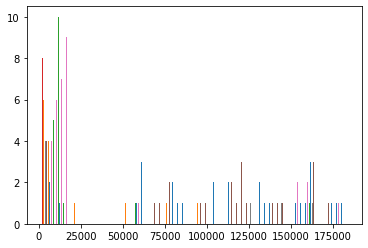

In [147]:
st = []
for nneighbors in range(5,20,2):
    for minneighbors in range(1,10,2):
        for symetry in np.linspace(0,0.8,5):
            item = ItemItem(nneighbors,minneighbors,symetry)
            item = Recommender.adapt(item)
            item.fit(data.ratings)
            s = item.recommend(-1,10,ratings = df['ratings'])['item']
            print(f'{nneighbors} {minneighbors} {symetry} {s.values}')
            st.append(s)
import matplotlib.pyplot as plt

plt.hist(np.array(st).flatten())
plt.show()


5 1 0.0 [  6818  40491  87234  99764  58301 112421 143367 156605   3525   1178]
5 1 0.2 []
5 1 0.4 []
5 1 0.6000000000000001 []
5 1 0.8 []
5 3 0.0 [ 1178 71899  1194 96821  7842 53123  3435  3266   951  6820]
5 3 0.2 []
5 3 0.4 []
5 3 0.6000000000000001 []
5 3 0.8 []
5 5 0.0 [  3435   1411    928   1237  54001    898   1278   4642    933 122926]
5 5 0.2 []
5 5 0.4 []
5 5 0.6000000000000001 []
5 5 0.8 []
5 7 0.0 []
5 7 0.2 []
5 7 0.4 []
5 7 0.6000000000000001 []
5 7 0.8 []
5 9 0.0 []
5 9 0.2 []
5 9 0.4 []
5 9 0.6000000000000001 []
5 9 0.8 []
7 1 0.0 [  6818  40491  87234  99764  58301 112421 143367 156605   3525   1178]
7 1 0.2 []
7 1 0.4 []
7 1 0.6000000000000001 []
7 1 0.8 []
7 3 0.0 [ 1178 71899  1194 96821  7842 53123  3435  3266   951  6820]
7 3 0.2 []
7 3 0.4 []
7 3 0.6000000000000001 []
7 3 0.8 []
7 5 0.0 [  3435   1411    928   1237  54001   4642 122926   1278   3200   3468]
7 5 0.2 []
7 5 0.4 []
7 5 0.6000000000000001 []
7 5 0.8 []
7 7 0.0 [54001  1278  2186   933  8368   898 3

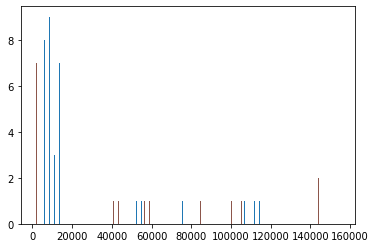

In [148]:
st = []
for nneighbors in range(5,20,2):
    for minneighbors in range(1,10,2):
        for symetry in np.linspace(0,0.8,5):
            item = UserUser(nneighbors,minneighbors,symetry)
            item = Recommender.adapt(item)
            item.fit(data.ratings)
            s = item.recommend(-1,10,ratings = df['ratings'])['item']
            print(f'{nneighbors} {minneighbors} {symetry} {s.values}')
            st.append(s)
import matplotlib.pyplot as plt

plt.hist(np.array(st).flatten())
plt.show()

Com a diferencia significativa podem veure que afecta molt mes el canviar el threshold, en aquest cas si supera 0.2 no considera ningua pel.ícula com a valida; per tant es passa a fer entre 0 i 0.2

5 1 0.0 [  6818  40491  87234  99764  58301 112421 143367 156605   3525   1178]
5 1 0.05 [  858   319  1089  1917  2028  2700  2959  8464 27704 33794]
5 1 0.1 [  527   858 58559   318   362   783   805  1242  2150  2739]
5 1 0.15000000000000002 []
5 1 0.2 []
5 3 0.0 [ 1178 71899  1194 96821  7842 53123  3435  3266   951  6820]
5 3 0.05 [110 780 356 736 266 480 153  34 457 150]
5 3 0.1 []
5 3 0.15000000000000002 []
5 3 0.2 []
5 5 0.0 [  3435   1411    928   1237  54001    898   1278   4642    933 122926]
5 5 0.05 [110 780 356 736 480 153 527 589 318 380]
5 5 0.1 []
5 5 0.15000000000000002 []
5 5 0.2 []
5 7 0.0 []
5 7 0.05 []
5 7 0.1 []
5 7 0.15000000000000002 []
5 7 0.2 []
5 9 0.0 []
5 9 0.05 []
5 9 0.1 []
5 9 0.15000000000000002 []
5 9 0.2 []
7 1 0.0 [  6818  40491  87234  99764  58301 112421 143367 156605   3525   1178]
7 1 0.05 [  858   319  1089  1917  2028  2700  2959  8464 27704 33794]
7 1 0.1 [  527   858 58559   318   362   783   805  1242  2150  2739]
7 1 0.15000000000000002 []

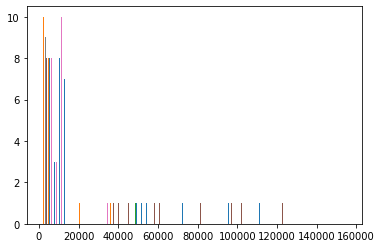

In [149]:
st = []
for nneighbors in range(5,20,2):
    for minneighbors in range(1,10,2):
        for symetry in np.linspace(0,0.2,5):
            item = UserUser(nneighbors,minneighbors,symetry)
            item = Recommender.adapt(item)
            item.fit(data.ratings)
            s = item.recommend(-1,10,ratings = df['ratings'])['item']
            print(f'{nneighbors} {minneighbors} {symetry} {s.values}')
            st.append(s)
import matplotlib.pyplot as plt

plt.hist(np.array(st).flatten())
plt.show()

# 4. Fés 10 prediccions amb cada un dels mètodes. Apareixen pel·lícules en comú?

Sense tocar paràmetres no coincideix cap predicció.

In [176]:
import collections
popular = Popular() #Nomes pot rebre un argument que es un selector d'items
popular = Recommender.adapt(popular) 
popular.fit(data.ratings)

bias = Bias() # Pot 
bias = Recommender.adapt(bias)
bias.fit(data.ratings)

item = ItemItem(5)
item = Recommender.adapt(item)
item.fit(data.ratings)


user = UserUser(5)
user = Recommender.adapt(user)
user.fit(data.ratings)

methods = [popular,bias,item,user]
s=[]
for method in methods:
    s.append(method.recommend(-1,10,ratings=df['ratings'])['item'])
collections.Counter(np.array(s).flatten())

Counter({356: 1,
         318: 1,
         296: 1,
         593: 1,
         2571: 1,
         260: 1,
         480: 1,
         110: 1,
         589: 1,
         527: 1,
         53: 1,
         99: 1,
         148: 1,
         467: 1,
         495: 1,
         496: 1,
         626: 1,
         633: 1,
         876: 1,
         1140: 1,
         115122: 1,
         103688: 1,
         74727: 1,
         117192: 1,
         64197: 1,
         59103: 1,
         148671: 1,
         147376: 1,
         86892: 1,
         147382: 1,
         6818: 1,
         40491: 1,
         87234: 1,
         99764: 1,
         58301: 1,
         112421: 1,
         143367: 1,
         156605: 1,
         3525: 1,
         1178: 1})

Forcem la coincidencia tocant els parametres

In [177]:
popular = Popular() #Nomes pot rebre un argument que es un selector d'items
popular = Recommender.adapt(popular) 
popular.fit(data.ratings)

bias = Bias(True,True,(0.1,0.1)) # Pot 
bias = Recommender.adapt(bias)
bias.fit(data.ratings)

item = ItemItem(7)
item = Recommender.adapt(item)
item.fit(data.ratings)


user = UserUser(7)
user = Recommender.adapt(user)
user.fit(data.ratings)

methods = [popular,bias,item,user]
s=[]
for method in methods:
    s.append(method.recommend(-1,10,ratings=df['ratings'])['item'])
    

print(f"There is at least one repeated {any([x>1 for x in collections.Counter(np.array(s).flatten()).keys()])}"")

Counter({356: 1,
         318: 1,
         296: 1,
         593: 1,
         2571: 1,
         260: 1,
         480: 1,
         110: 1,
         589: 1,
         527: 1,
         53: 1,
         99: 1,
         1151: 1,
         3473: 1,
         6442: 1,
         6818: 2,
         78836: 1,
         6460: 1,
         148: 1,
         467: 1,
         103688: 1,
         74727: 1,
         115122: 1,
         117192: 1,
         64197: 1,
         86892: 1,
         147382: 1,
         68848: 1,
         166024: 1,
         68269: 1,
         40491: 1,
         87234: 1,
         99764: 1,
         58301: 1,
         112421: 1,
         143367: 1,
         156605: 1,
         3525: 1,
         1178: 1})

# 5. Com podriem fer per obtenir recomenacions conjuntes?

La idea que es segueix principalment es generar scores de cada model, normalitzar-les i ponderar-les.

In [251]:
import collections
from sklearn.preprocessing import MinMaxScaler
popular = Popular() #Nomes pot rebre un argument que es un selector d'items
popular = Recommender.adapt(popular) 
popular.fit(data.ratings)

bias = Bias() # Pot 
bias = Recommender.adapt(bias)
bias.fit(data.ratings)

item = ItemItem(5)
item = Recommender.adapt(item)
item.fit(data.ratings)


user = UserUser(5)
user = Recommender.adapt(user)
user.fit(data.ratings)

methods = [popular,bias,item,user]
s=[]
for method in methods:
    s.append(method.recommend(-1,10000,ratings=df['ratings']))

####Comparem els dos que tenen menys elements ########
p = set()
for x in s[2]['item']:
    if x in s[3]['item']:
        p.add(x)

values = [x for x in p]
info = {'item':[],'pop':[],'bias':[],'item':[],'user':[]}
s1,s2,s3,s4 = [],[],[],[]

for x in values:
    s1.append(s[0][s[0]['item'] == x]['score'].values[0])
    s2.append(s[1][s[1]['item'] == x]['score'].values[0])
    s3.append(s[2][s[2]['item'] == x]['score'].values[0])
    s4.append(s[3][s[3]['item'] == x]['score'].values)


info = {'item':values,'pop':s1,'bias':s2,'item':s3,'user':s4}
df_ = pd.DataFrame(info)

In [252]:
df_['user'] = [x[0] if len(x)==1 else np.NaN for x in df_['user']]
df_ = df_.dropna()
scaled = MinMaxScaler().fit_transform(df_.values)

In [264]:
num_to_predict = 5
idxes = np.argsort(np.sum(scaled*0.25,axis=1))
info  = {'items': [x for x in np.array(values)[idxes]]}
pd.DataFrame(info)[:num_to_predict]

,items
0,4016
1,3784
2,5564
3,3783
4,3641


Degut a que no tenim groudtruth i per tant no podem fer la regressió el que es fa es ponderar els 4 models per igual i donar un resultat

## C. Recomenadors SVD (50%)

En aquest últim apartat, veurem com evaluar aquests models. A més, també instanciarem una de les families de recomenadors més utilitzats en l'actualitat.

#### Models

Al setembre del 2009, [Netflix va atorgar un premi de 1.000.000 de dòlars](https://en.wikipedia.org/wiki/Netflix_Prize) a un equip que havia desenvolupat un algorisme que millorava les prediccions de qualificació en més d’un 10%. El tercer lloc va quedar en una entrada individual de Simon Funk - FunkSVD.

Tenint en compte la matriu de valoracions dels usuaris a diferents pel·lícules, l'objectiu final és omplir les valoracions desconegudes amb prediccions, de manera que puguem agafar la màxima d'aquestes prediccions com a recomanacions. 

Aquest mètodes ho aconsegueixen mitjançant la introducció d’un conjunt d’entitats intermediàries conegudes com a factors latents, que són apresos automàticament. Per entendre-ho millor, podem pensar que són propietats dels items que poden agradar o no als usuaris: cada factor latent és un nou atribut per valorar una pel·lícula. Per exemple, una pel·lícula pot ser més dramàtica o menys, més graciosa o gens, més llarga o curta, amb actors coneguts o desconeguts.. I cada una d'elles pot influir en la valoració d’un usuari positiva o negativament. Tenint en compte aquestes informacions, es podrà reconstruir la matriu *completa* de valoracions dels usuaris i restaurants mitjançant la multiplicació de matrius. En el següent enllaç teniu una explicació detallada del mètode [funksvd](https://towardsdatascience.com/personalised-restaurant-recommendations-using-funksvd-3beff200b01c).

Farem servir aquests models:

* [**FunkSVD**](https://lkpy.readthedocs.io/en/stable/mf.html#funksvd): FunkSVD és un tipus de factorització de matrius com SVD que utilitza un descens de gradient estocàstic, per entrenar les matrius de característiques d'usuari i la matriu de característiques de matrius. En general, no es recomana utilitzar-lo en aplicacions o experiments nous; els algoritmes basats en ALS (mínims quadrats alternats) són menys sensibles als hiperparàmetres i actualment amb TensorFlow proporcionen un entrenament del descens de gradient més optimitzada del mateix model de predicció.

* [**BiasedMF**](https://lkpy.readthedocs.io/en/stable/mf.html#lenskit.algorithms.als.BiasedMF): factorització de matriu esbiaixada entrenada amb mínims quadrats alternats. Es tracta d’un algorisme orientat a la predicció adequat per a dades amb feedback explícites (ratings).

* [**ImplicitMF**](https://lkpy.readthedocs.io/en/stable/mf.html#lenskit.algorithms.als.ImplicitMF): factorització de matriu implícita entrenada amb mínims quadrats alternats. Aquest algorisme genera "prediccions", però no són a una escala significativa. Si les seves dades d'entrada contenen valors de classificació, s'utilitzaran com a valors de "confiança"; en cas contrari, la confiança serà 1 per cada article classificat.


#### Crossvalidació
La crossvalidació també té aspectes interessants, ja que no només s'han de separar els conjunts d'entrenament i test per usuaris (en comptes que únicament per qualificacions), sinó que també es pot tenir en compte el eix temporal, ja que les prediccions i els gustos dels usuaris solen cambiar, evolucionar amb el temps, així que les darreres qualificacions tenen més importancia que les primeres. En aquesta llibreria tenim les dues opcions:
* [**row-based-splitting**](https://lkpy.readthedocs.io/en/stable/crossfold.html#row-based-splitting): seria el cas comú en classificació. Es separen els exemples aleatoriament en conjunts d'entrenament i de test.
* [**user-based-splitting**](https://lkpy.readthedocs.io/en/stable/crossfold.html#user-based-splitting): seria el més adient. Els passos que segueix son els següents:
  * Particiona el conjunt d'identificadors d'usuari en $n$ conjunts d'usuaris de test (cada $n$ representa un fold)
  * Ara bé, no es selecciona tot un usuari com a test, sino que **només es selecciona un conjunt de files** d'aquests usuaris de test per convertir-se en les files de test real. Es pot escollir (entre d'altres) amb els mètodes `SampleFrac()` o bé `LastFrac()` si es volen agafar els exemples aleatoriament o els darrers valorats.  
  * Finalment, les dades que no són seleccionades com a test, es converteixen en conjunt d'entrenament (per cada un dels folds).





#### Evaluació
Finalment, veurem com l'evaluació també té les seves pròpies mètriques, el que també el converteix en un problema interessant No només volem predir correctament la valoració d'un usuari per una pel·lícula en concret, sinó que voldriem aconseguir que el resultat obtingut segueixi un ranking de més a menys rellevants. A ningú li agrada fer scrolling per trobar les millors recomenacions (o buscar a les següents pagines de google per trobar un resultat satisfactori). 

Per aquest motiu, analitzarem quines mètriques existeixen per tal d'evaluar el rendiment del sistema.

Mètriques de regressió:
* [**MAE**](https://lkpy.readthedocs.io/en/stable/evaluation/predict-metrics.html#lenskit.metrics.predict.mae) (Mean Absolute Error) Calcula la distància entre la predicció i el valor del groundtruth en termes absoluts.
* [**RMSE**](https://lkpy.readthedocs.io/en/stable/evaluation/predict-metrics.html#lenskit.metrics.predict.rmse) (Root Mean Squared Error). Calcula l'arrel de les distàncies dels errors al quadrat. Aquesta mètrica té algunes implicacions interessants. Atès que els errors es computen al quadrat abans que es faci la mitjana, la RMSE dóna un pes relativament elevat als grans errors. Això significa que el RMSE hauria de ser més útil quan els errors grans són particularment indesitjables.

Mètriques de classificació:
* [**TopN-Precisio**](https://lkpy.readthedocs.io/en/stable/evaluation/topn-metrics.html#lenskit.metrics.topn.precision) Per cada usuari, s'ordenen les mostres de test segons el score de predicció i s'agafen les top N. Aquestes top, serien les recomenacions. Amb aquesta mètrica es calcula la precisió del model per l'usuari (quantes de les recomenacions fetes són bones recomenacions).
* [**TopN-Recall**](https://lkpy.readthedocs.io/en/stable/evaluation/topn-metrics.html#lenskit.metrics.topn.recall) Similar al anterior, però calculant el recall de les recomenacions (del total de exemples de test que poden ser positius, quantes de elles les ha recomenat el model).

Mètriques de ranking:
* **MRR** (Mean Reciprocal Rank). Comptabilitza en quina posició es troba la primera recomenació correcta. Funciona pel cas binari.
* **MAP** (Mean Average Precision). Té en compte el ranking de la classificació, però només funciona pel cas binari (per exemple, qualificacions implícites), però és complicat evaluar qualificacions explícites.
* [**NDCG**](https://lkpy.readthedocs.io/en/stable/evaluation/topn-metrics.html#lenskit.metrics.topn.ndcg) (Normalized Discounted Cumulative Gain). Pot utilitzar el fet que alguns documents són "més" rellevants que d'altres. Els ítems més rellevants haurien de ser mostrats abans que els menys rellevants, i aquests per davant que els ítems no rellevants.

Una bona explicació dels pros i contres d'aquestes mètriques la podem trobar en aquest [enllaç](https://link.medium.com/8DbsYzhNCbb).



#### Definir experiment

In [293]:
from lenskit.algorithms import Recommender, basic
from lenskit import batch, topn, util
import numpy as np

def experiment(name, algo, train, test, n=20):
    fittable = util.clone(algo)   # alguns metodes fallen al fet fit varis cops.. aixi funciona
    
    base = basic.Bias(damping=25)  # si el metode algo no pot predir alguna qualificació, agafa aquesta per defecte 
    fittable = basic.Fallback(fittable, base)

    fittable = Recommender.adapt(fittable)   # de vegades no tots els algorismes tenen recomenadors (només predictors, aixi agafa el per defecte)

    fittable.fit(train)
    preds = batch.predict(fittable, test)
    
    users = test.user.unique()               # agafem els users de test per donar recomenacions
    recs = batch.recommend(fittable, users, n)[:n]

    # add the algorithm name for analyzability
    recs['Algorithm'] = name
    preds['Algorithm'] = name
    return recs, preds


#### Crossvalidació

In [294]:
from lenskit import crossfold as xf
import lenskit.util
from tqdm import tqdm
import sys

def crossvalidar(ratings, models, splitting, metriques, n_partitions=5, n_recomenacions=10):
    rnd = lenskit.util.rng(24)
    
    if splitting == "row":
        folds = xf.partition_rows(ratings[['user', 'item', 'rating', 'timestamp']], n_partitions, rng_spec=rnd)       
    elif splitting == "user":
        n_test = xf.SampleFrac(0.2) # 20% of the ratings of the users from the test-fold
        folds = xf.partition_users(ratings[['user', 'item', 'rating', 'timestamp']], n_partitions, n_test, rng_spec=rnd)
    else:
        raise("Splitting not known")
    
    all_recs = []
    all_preds = []
    test_data = []
    
    print("CROSSVALIDATION")
    print("Data: {}".format(ratings.shape))
    print("Models: {}".format(list(models.keys())))
    print("Splitting: {}".format(splitting))
    print("Metrics: {}".format([m.__name__ for m in metriques]))
    sys.stdout.flush()
    
    for i, (train, test) in enumerate(folds):
        tqdm_inner_loop = tqdm(models, desc='[fold {} of {}]'.format(i+1, n_partitions))
        for model_name in tqdm_inner_loop:
            tqdm_inner_loop.set_postfix({"model": model_name, "train": train.shape[0], "test": test.shape[0]})
            recs, preds = experiment(model_name, models[model_name], train, test, n=n_recomenacions)
            all_recs.append(recs)
            all_preds.append(preds)
        test_data.append(test)

    all_recs = pd.concat(all_recs, ignore_index=True)
    all_preds = pd.concat(all_preds, ignore_index=True)
    test_data = pd.concat(test_data, ignore_index=True)
    
    all_preds = all_preds.merge(test_data[["user",
                                           "item", 
                                           "rating"]].rename(columns={"rating":"true_label"}), 
                                on=["user","item"])
        
    results_predict = []
    rla = topn.RecListAnalysis()
    for m in metriques:
        if "topn" in m.__module__:
            rla.add_metric(m)

    results = rla.compute(all_recs, test_data)
    
    for m in metriques:
        if "predict" in m.__module__:
            res = all_preds.groupby(['Algorithm','user']).apply(lambda df: m(df["prediction"], df["true_label"]))
            results[m.__name__] = res

    return results


#### Instanciar models

In [286]:
from lenskit.algorithms import item_knn, user_knn, als, basic, bias, funksvd

models = {
    "Item":item_knn.ItemItem(7),
    "User": user_knn.UserUser(7),
    "Biased" : als.BiasedMF(500),
    "Implicit":als.ImplicitMF(500),
    "Bias": bias.Bias(),
    "FunkSVD": funksvd.FunkSVD(500)
}



#### Definir mètriques

In [287]:
from lenskit import topn
from lenskit.metrics import predict

metriques = [
    predict.mae,predict.rmse,topn.precision,topn.recall,topn.recip_rank,topn.ndcg
]


#### Definir splitting method

#### Executar experiment

In [289]:
results = crossvalidar(data.ratings, models, splitting, metriques )
results.groupby("Algorithm").mean()

CROSSVALIDATION
Data: (100836, 4)
Models: ['Item', 'User', 'Biased', 'Implicit', 'Bias', 'FunkSVD']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']





[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s]


[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s, model=Item, train=96367, test=4469]


[fold 1 of 5]:  17%|█▋        | 1/6 [00:12<01:04, 12.95s/it, model=Item, train=96367, test=4469]


[fold 1 of 5]:  17%|█▋        | 1/6 [00:12<01:04, 12.95s/it, model=User, train=96367, test=4469]


[fold 1 of 5]:  33%|███▎      | 2/6 [00:20<00:45, 11.46s/it, model=User, train=96367, test=4469]


[fold 1 of 5]:  33%|███▎      | 2/6 [00:20<00:45, 11.46s/it, model=Biased, train=96367, test=4469]


[fold 1 of 5]:  50%|█████     | 3/6 [00:31<00:33, 11.05s/it, model=Biased, train=96367, test=4469]


[fold 1 of 5]:  50%|█████     | 3/6 [00:31<00:33, 11.05s/it, model=Implicit, train=96367, test=4469]


[fold 1 of 5]:  67%|██████▋   | 4/6 [00:45<00:24, 12.14s/it, model=Implicit, train=96367, test=4469]


[fold 1 of 5]:  67%|██████▋   | 4/6 [00:45<00:24, 12.14s/it, model=Bias, train=96367, test=4469]    


[fold 1 of 5]:  83%|████████▎ | 5/6 [00:50<

,nrecs,precision,recall,recip_rank,ndcg,mae,rmse
Algorithm,,,,,,,
Bias,10.0,0.000656,0.000180,0.002190,0.000167,0.706266,0.873271
Biased,10.0,0.050984,0.023868,0.133826,0.032847,0.702640,0.872552
FunkSVD,10.0,0.000000,0.000000,0.000000,0.000000,0.699311,0.863526
Implicit,10.0,0.287049,0.166375,0.560049,0.205643,3.281688,3.422384
Item,10.0,0.001803,0.000278,0.003176,0.000422,0.691116,0.862120
User,10.0,0.000328,0.000099,0.000416,0.000098,0.719772,0.893062


#### Preguntes

1. Fes una taula de resum que compari els diferents algoritmes (parametres per defecte) vistos per les diferents mètriques. La taula ha de contenir almenys 6 mètodes diferents i les 6 mètriques explicades.
2. Compara els resultats tenint en compte el split de rows o el de usuaris. Quin dels dos dona uns resultats millors? Per què?
3. Com afecta el parametre de n_recomenacions en la precisió i el recall? Fés una gràfica mostrant els resultats
4. Busca quins parametres afecten a cada model, i intenta optimitzar-ne els resultats. Guarda la taula inicial i compara finalment la millora aconseguida en una 3a taula on hi mostris el percentatge de millora.


#### Respostes

# 1. Fes una taula de resum que compari els diferents algoritmes (parametres per defecte) vistos per les diferents mètriques. La taula ha de contenir almenys 6 mètodes diferents i les 6 mètriques explicades.

In [290]:
splitting = "user"
#splitting = "row"
results = crossvalidar(data.ratings, models, splitting, metriques )
results.groupby("Algorithm").mean()

CROSSVALIDATION
Data: (100836, 4)
Models: ['Item', 'User', 'Biased', 'Implicit', 'Bias', 'FunkSVD']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']





[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s]


[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s, model=Item, train=96367, test=4469]


[fold 1 of 5]:  17%|█▋        | 1/6 [00:09<00:48,  9.75s/it, model=Item, train=96367, test=4469]


[fold 1 of 5]:  17%|█▋        | 1/6 [00:09<00:48,  9.75s/it, model=User, train=96367, test=4469]


[fold 1 of 5]:  33%|███▎      | 2/6 [00:18<00:37,  9.32s/it, model=User, train=96367, test=4469]


[fold 1 of 5]:  33%|███▎      | 2/6 [00:18<00:37,  9.32s/it, model=Biased, train=96367, test=4469]


[fold 1 of 5]:  50%|█████     | 3/6 [00:29<00:29,  9.88s/it, model=Biased, train=96367, test=4469]


[fold 1 of 5]:  50%|█████     | 3/6 [00:29<00:29,  9.88s/it, model=Implicit, train=96367, test=4469]


[fold 1 of 5]:  67%|██████▋   | 4/6 [00:45<00:23, 11.74s/it, model=Implicit, train=96367, test=4469]


[fold 1 of 5]:  67%|██████▋   | 4/6 [00:45<00:23, 11.74s/it, model=Bias, train=96367, test=4469]    


[fold 1 of 5]:  83%|████████▎ | 5/6 [00:49<

,nrecs,precision,recall,recip_rank,ndcg,mae,rmse
Algorithm,,,,,,,
Bias,10.0,0.000492,0.000289,0.002078,0.000558,0.709723,0.873517
Biased,10.0,0.053934,0.026080,0.141254,0.035514,0.710138,0.878581
FunkSVD,10.0,0.000000,0.000000,0.000000,0.000000,0.704791,0.865145
Implicit,10.0,0.285574,0.167676,0.563880,0.203302,3.283485,3.423383
Item,10.0,0.001475,0.000212,0.002816,0.000389,0.695253,0.865645
User,10.0,0.000820,0.000511,0.001576,0.000181,0.723937,0.898731


# 2. Compara els resultats tenint en compte el split de rows o el de usuaris. Quin dels dos dona uns resultats millors? Per què?

In [295]:
#splitting = "user"
splitting = "row"
results = crossvalidar(data.ratings, models, splitting, metriques ,n_recomenacions=10)
results.groupby("Algorithm").mean()

CROSSVALIDATION
Data: (100836, 4)
Models: ['Item', 'User', 'Biased', 'Implicit', 'Bias', 'FunkSVD']
Splitting: row
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']





[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s]


[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s, model=Item, train=80668, test=20168]


[fold 1 of 5]:  17%|█▋        | 1/6 [00:14<01:12, 14.59s/it, model=Item, train=80668, test=20168]


[fold 1 of 5]:  17%|█▋        | 1/6 [00:14<01:12, 14.59s/it, model=User, train=80668, test=20168]


[fold 1 of 5]:  33%|███▎      | 2/6 [00:24<00:53, 13.32s/it, model=User, train=80668, test=20168]


[fold 1 of 5]:  33%|███▎      | 2/6 [00:24<00:53, 13.32s/it, model=Biased, train=80668, test=20168]


[fold 1 of 5]:  50%|█████     | 3/6 [00:42<00:44, 14.71s/it, model=Biased, train=80668, test=20168]


[fold 1 of 5]:  50%|█████     | 3/6 [00:42<00:44, 14.71s/it, model=Implicit, train=80668, test=20168]


[fold 1 of 5]:  67%|██████▋   | 4/6 [01:06<00:34, 17.45s/it, model=Implicit, train=80668, test=20168]


[fold 1 of 5]:  67%|██████▋   | 4/6 [01:06<00:34, 17.45s/it, model=Bias, train=80668, test=20168]    


[fold 1 of 5]:  83%|████████▎ | 5/

,nrecs,precision,recall,recip_rank,ndcg,mae,rmse
Algorithm,,,,,,,
Bias,10.0,0.00,0.000000,0.000000,0.000000,0.615973,0.825185
Biased,10.0,0.04,0.002116,0.090000,0.006445,0.619189,0.829644
FunkSVD,10.0,0.00,0.000000,0.000000,0.000000,0.614373,0.818477
Implicit,10.0,0.34,0.016749,0.616667,0.045811,3.264218,3.416776
Item,10.0,0.02,0.000228,0.033333,0.000713,0.619948,0.829970
User,10.0,0.00,0.000000,0.000000,0.000000,0.626271,0.847413


# 3. Com afecta el parametre de n_recomenacions en la precisió i el recall? Fés una gràfica mostrant els resultats

In [302]:
splitting = "user"
df = {"Algorithm":[],"n_rec":[],"recall":[],"precisio":[]}
for recom in np.round(np.linspace(5,100,10)):
    results = crossvalidar(data.ratings, models, splitting, metriques,n_recomenacions=int(recom))
    results.groupby("Algorithm").mean()
    for name,prec,recall in zip(results.index,results['precision'],results['recall']):
        df['Algorithm'].append(name)
        df["n_rec"].append(recom)
        df['recall'].append(recall)
        df['precisio'].append(prec)

CROSSVALIDATION
Data: (100836, 4)
Models: ['Item', 'User', 'Biased', 'Implicit', 'Bias', 'FunkSVD']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']






[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s]



[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:10<00:50, 10.16s/it, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:10<00:50, 10.16s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:18<00:38,  9.57s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:18<00:38,  9.57s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:29<00:30, 10.01s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:29<00:30, 10.01s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:44<00:23, 11.53s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:44<00:23, 11.53s/it, model=Bias, train=96367, test=4469]    



[fold 1 of 5]:  83%|████████▎ | 

CROSSVALIDATION
Data: (100836, 4)
Models: ['Item', 'User', 'Biased', 'Implicit', 'Bias', 'FunkSVD']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']






[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s]



[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:09<00:47,  9.48s/it, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:09<00:47,  9.48s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:17<00:36,  9.02s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:17<00:36,  9.02s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:27<00:28,  9.47s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:27<00:28,  9.47s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:42<00:22, 11.11s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:42<00:22, 11.11s/it, model=Bias, train=96367, test=4469]    



[fold 1 of 5]:  83%|████████▎ | 

CROSSVALIDATION
Data: (100836, 4)
Models: ['Item', 'User', 'Biased', 'Implicit', 'Bias', 'FunkSVD']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']






[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s]



[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:09<00:47,  9.49s/it, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:09<00:47,  9.49s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:17<00:35,  9.00s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:17<00:35,  9.00s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:27<00:28,  9.46s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:27<00:28,  9.46s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:42<00:22, 11.14s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:42<00:22, 11.14s/it, model=Bias, train=96367, test=4469]    



[fold 1 of 5]:  83%|████████▎ | 

CROSSVALIDATION
Data: (100836, 4)
Models: ['Item', 'User', 'Biased', 'Implicit', 'Bias', 'FunkSVD']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']






[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s]



[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:09<00:46,  9.26s/it, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:09<00:46,  9.26s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:17<00:35,  8.82s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:17<00:35,  8.82s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:27<00:28,  9.35s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:27<00:28,  9.35s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:42<00:22, 11.04s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:42<00:22, 11.04s/it, model=Bias, train=96367, test=4469]    



[fold 1 of 5]:  83%|████████▎ | 

CROSSVALIDATION
Data: (100836, 4)
Models: ['Item', 'User', 'Biased', 'Implicit', 'Bias', 'FunkSVD']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']






[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s]



[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:08<00:44,  8.97s/it, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:08<00:44,  8.97s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:16<00:34,  8.52s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:16<00:34,  8.52s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:26<00:26,  8.97s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:26<00:26,  8.97s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:41<00:21, 10.75s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:41<00:21, 10.75s/it, model=Bias, train=96367, test=4469]    



[fold 1 of 5]:  83%|████████▎ | 

CROSSVALIDATION
Data: (100836, 4)
Models: ['Item', 'User', 'Biased', 'Implicit', 'Bias', 'FunkSVD']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']






[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s]



[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:08<00:44,  8.97s/it, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:08<00:44,  8.97s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:16<00:34,  8.53s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:16<00:34,  8.53s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:26<00:26,  8.90s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:26<00:26,  8.90s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:40<00:20, 10.49s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:40<00:20, 10.49s/it, model=Bias, train=96367, test=4469]    



[fold 1 of 5]:  83%|████████▎ | 

CROSSVALIDATION
Data: (100836, 4)
Models: ['Item', 'User', 'Biased', 'Implicit', 'Bias', 'FunkSVD']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']






[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s]



[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:08<00:43,  8.69s/it, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:08<00:43,  8.69s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:15<00:33,  8.26s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:15<00:33,  8.26s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:25<00:25,  8.58s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:25<00:25,  8.58s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:38<00:20, 10.07s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:38<00:20, 10.07s/it, model=Bias, train=96367, test=4469]    



[fold 1 of 5]:  83%|████████▎ | 

CROSSVALIDATION
Data: (100836, 4)
Models: ['Item', 'User', 'Biased', 'Implicit', 'Bias', 'FunkSVD']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']






[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s]



[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:08<00:43,  8.66s/it, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:08<00:43,  8.66s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:15<00:32,  8.22s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:15<00:32,  8.22s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:25<00:25,  8.52s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:25<00:25,  8.52s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:38<00:20, 10.08s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:38<00:20, 10.08s/it, model=Bias, train=96367, test=4469]    



[fold 1 of 5]:  83%|████████▎ | 

CROSSVALIDATION
Data: (100836, 4)
Models: ['Item', 'User', 'Biased', 'Implicit', 'Bias', 'FunkSVD']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']






[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s]



[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:08<00:43,  8.75s/it, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:08<00:43,  8.75s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:15<00:33,  8.26s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:15<00:33,  8.26s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:25<00:25,  8.56s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:25<00:25,  8.56s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:38<00:20, 10.10s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:38<00:20, 10.10s/it, model=Bias, train=96367, test=4469]    



[fold 1 of 5]:  83%|████████▎ | 

CROSSVALIDATION
Data: (100836, 4)
Models: ['Item', 'User', 'Biased', 'Implicit', 'Bias', 'FunkSVD']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']






[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s]



[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:08<00:43,  8.66s/it, model=Item, train=96367, test=4469]



[fold 1 of 5]:  17%|█▋        | 1/6 [00:08<00:43,  8.66s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:15<00:32,  8.21s/it, model=User, train=96367, test=4469]



[fold 1 of 5]:  33%|███▎      | 2/6 [00:15<00:32,  8.21s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:24<00:25,  8.50s/it, model=Biased, train=96367, test=4469]



[fold 1 of 5]:  50%|█████     | 3/6 [00:25<00:25,  8.50s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:38<00:20, 10.05s/it, model=Implicit, train=96367, test=4469]



[fold 1 of 5]:  67%|██████▋   | 4/6 [00:38<00:20, 10.05s/it, model=Bias, train=96367, test=4469]    



[fold 1 of 5]:  83%|████████▎ | 

In [338]:
from plotly import express
df=pd.DataFrame(df)

px.histogram(df, x="precisio",
  color="Algorithm",
  facet_col="n_rec",
  facet_col_wrap=5)

In [339]:
from plotly import express
df=pd.DataFrame(df)

px.histogram(df, x="recall",
  color="Algorithm",
  facet_col="n_rec",
  facet_col_wrap=5)

Es pot apreciar que la majoria dels casos volta el 0% tot i així el model implicit té  performance acceptabñe quan el nombre a reconeixer es petit. De fet quan es mes petit el nombre a reconeixer hi ha tres columnes totalment disperses i a mesura que es fa gran es va concentrant en el 0.

Podem veure l'efecte invers en el recall;amb molt poques recomenacions està molt aprop de 0 mentre que es va dispersant sobre el rang 0-1 a mesura que es fa gran el nombre de recomanacions.

# 4. Busca quins parametres afecten a cada model, i intenta optimitzar-ne els resultats. Guarda la taula inicial i compara finalment la millora aconseguida en una 3a taula on hi mostris el percentatge de millora.

In [ ]:
models = {
    "Item":item_knn.ItemItem(7),
    "User": user_knn.UserUser(7),
    "Biased" : als.BiasedMF(500),
    "Implicit":als.ImplicitMF(500),
    "Bias": bias.Bias(),
    "FunkSVD": funksvd.FunkSVD(500)
}


Provarem de conseguir millores en cada model individualment :

In [345]:
results = crossvalidar(data.ratings, {'Bias':bias.Bias(True,True,50)}, splitting, metriques,n_recomenacions=10)
results.groupby("Algorithm").mean()

CROSSVALIDATION
Data: (100836, 4)
Models: ['Bias']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']






[fold 1 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]



[fold 1 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=Bias, train=96367, test=4469]



[fold 1 of 5]: 100%|██████████| 1/1 [00:03<00:00,  3.88s/it, model=Bias, train=96367, test=4469]




[fold 2 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]



[fold 2 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=Bias, train=97109, test=3727]



[fold 2 of 5]: 100%|██████████| 1/1 [00:04<00:00,  4.05s/it, model=Bias, train=97109, test=3727]




[fold 3 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]



[fold 3 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=Bias, train=96555, test=4281]



[fold 3 of 5]: 100%|██████████| 1/1 [00:04<00:00,  4.01s/it, model=Bias, train=96555, test=4281]




[fold 4 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]



[fold 4 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=Bias, train=96661, test=4175]



[fold 4 of 5]: 100%|██████████| 1/1 [00:03<00:00,  3.92s/it, model=Bias, train=96661, test=4175]






,nrecs,precision,recall,recip_rank,ndcg,mae,rmse
Algorithm,,,,,,,
Bias,10.0,0.1,0.022346,0.133333,0.034693,1.138897,1.267069


In [351]:
results = crossvalidar(data.ratings, {'FunkSVD':funksvd.FunkSVD(500,iterations=200,lrate=1e-1,reg=0.2,damping=25)}, splitting, metriques,n_recomenacions=10)
results.groupby("Algorithm").mean()

CROSSVALIDATION
Data: (100836, 4)
Models: ['FunkSVD']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']







[fold 1 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]




[fold 1 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=FunkSVD, train=96367, test=4469]




[fold 1 of 5]: 100%|██████████| 1/1 [00:43<00:00, 43.92s/it, model=FunkSVD, train=96367, test=4469]





[fold 2 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]




[fold 2 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=FunkSVD, train=97109, test=3727]




[fold 2 of 5]: 100%|██████████| 1/1 [00:43<00:00, 43.07s/it, model=FunkSVD, train=97109, test=3727]





[fold 3 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]




[fold 3 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=FunkSVD, train=96555, test=4281]




[fold 3 of 5]: 100%|██████████| 1/1 [00:42<00:00, 42.91s/it, model=FunkSVD, train=96555, test=4281]





[fold 4 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]




[fold 4 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=FunkSVD, train=96661, test=4175]




[fold 4 of 5]: 100%|██████████| 1/1 [00:42<00:00, 42.96s/it, model=F

,nrecs,precision,recall,recip_rank,ndcg,mae,rmse
Algorithm,,,,,,,
FunkSVD,10.0,0.14,0.077598,0.228889,0.068574,1.092285,1.24947


Després de molts intents i temps perdut sense s'ha aconseguit una precisio decent.

In [391]:
results = crossvalidar(data.ratings, {"Biased" : als.BiasedMF(1000,iterations=150,reg=0.2,damping=50)}, splitting, metriques,n_recomenacions=10)
results.groupby("Algorithm").mean()

CROSSVALIDATION
Data: (100836, 4)
Models: ['Biased']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']







[fold 1 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]




[fold 1 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=Biased, train=96367, test=4469]




[fold 1 of 5]: 100%|██████████| 1/1 [00:59<00:00, 59.08s/it, model=Biased, train=96367, test=4469]





[fold 2 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]




[fold 2 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=Biased, train=97109, test=3727]




[fold 2 of 5]: 100%|██████████| 1/1 [00:58<00:00, 58.84s/it, model=Biased, train=97109, test=3727]





[fold 3 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]




[fold 3 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=Biased, train=96555, test=4281]




[fold 3 of 5]: 100%|██████████| 1/1 [00:59<00:00, 59.39s/it, model=Biased, train=96555, test=4281]





[fold 4 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]




[fold 4 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=Biased, train=96661, test=4175]




[fold 4 of 5]: 100%|██████████| 1/1 [00:58<00:00, 58.22s/it, model=Biased, 

,nrecs,precision,recall,recip_rank,ndcg,mae,rmse
Algorithm,,,,,,,
Biased,10.0,0.04,0.026873,0.22,0.052817,0.911921,1.130124


In [374]:
results = crossvalidar(data.ratings, {"User": user_knn.UserUser(20,3,0.1)}, splitting, metriques,n_recomenacions=10)
results.groupby("Algorithm").mean()

CROSSVALIDATION
Data: (100836, 4)
Models: ['User']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']







[fold 1 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]




[fold 1 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=User, train=96367, test=4469]




[fold 1 of 5]: 100%|██████████| 1/1 [00:07<00:00,  7.27s/it, model=User, train=96367, test=4469]





[fold 2 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]




[fold 2 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=User, train=97109, test=3727]




[fold 2 of 5]: 100%|██████████| 1/1 [00:07<00:00,  7.25s/it, model=User, train=97109, test=3727]





[fold 3 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]




[fold 3 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=User, train=96555, test=4281]




[fold 3 of 5]: 100%|██████████| 1/1 [00:07<00:00,  7.09s/it, model=User, train=96555, test=4281]





[fold 4 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]




[fold 4 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=User, train=96661, test=4175]




[fold 4 of 5]: 100%|██████████| 1/1 [00:06<00:00,  6.90s/it, model=User, train=96661, tes

,nrecs,precision,recall,recip_rank,ndcg,mae,rmse
Algorithm,,,,,,,
User,10.0,0.08,0.038043,0.116667,0.025098,1.072995,1.187451


In [394]:
results = crossvalidar(data.ratings, {"Item":item_knn.ItemItem(7)}, splitting, metriques,n_recomenacions=10)
results.groupby("Algorithm").mean()

CROSSVALIDATION
Data: (100836, 4)
Models: ['Item']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']







[fold 1 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]




[fold 1 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=Item, train=96367, test=4469]




[fold 1 of 5]: 100%|██████████| 1/1 [00:08<00:00,  8.47s/it, model=Item, train=96367, test=4469]





[fold 2 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]




[fold 2 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=Item, train=97109, test=3727]




[fold 2 of 5]: 100%|██████████| 1/1 [00:08<00:00,  8.77s/it, model=Item, train=97109, test=3727]





[fold 3 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]




[fold 3 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=Item, train=96555, test=4281]




[fold 3 of 5]: 100%|██████████| 1/1 [00:08<00:00,  8.89s/it, model=Item, train=96555, test=4281]





[fold 4 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]




[fold 4 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=Item, train=96661, test=4175]




[fold 4 of 5]: 100%|██████████| 1/1 [00:08<00:00,  8.63s/it, model=Item, train=96661, tes

,nrecs,precision,recall,recip_rank,ndcg,mae,rmse
Algorithm,,,,,,,
Item,10.0,0.0,0.0,0.0,0.0,0.937567,1.080775


In [ ]:
results = crossvalidar(data.ratings, {  "Implicit":als.ImplicitMF(1000,iterations=50, reg=0.3, weight=50),}, splitting, metriques,n_recomenacions=10)
results.groupby("Algorithm").mean()

CROSSVALIDATION
Data: (100836, 4)
Models: ['Implicit']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']








[fold 1 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]





[fold 1 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=Implicit, train=96367, test=4469]





[fold 1 of 5]: 100%|██████████| 1/1 [01:12<00:00, 72.24s/it, model=Implicit, train=96367, test=4469]






[fold 2 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]





[fold 2 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=Implicit, train=97109, test=3727]





[fold 2 of 5]: 100%|██████████| 1/1 [01:10<00:00, 70.85s/it, model=Implicit, train=97109, test=3727]






[fold 3 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]





[fold 3 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=Implicit, train=96555, test=4281]





[fold 3 of 5]: 100%|██████████| 1/1 [01:12<00:00, 72.83s/it, model=Implicit, train=96555, test=4281]






[fold 4 of 5]:   0%|          | 0/1 [00:00<?, ?it/s]





[fold 4 of 5]:   0%|          | 0/1 [00:00<?, ?it/s, model=Implicit, train=96661, test=4175]





[fold 4 of 5]: 100%|██████████| 1/1 [01:11<00:00,

In [409]:

final_table = {"Algorithm":["Bias","Biased","FunkSVD","Implicit","Item","User"],"Prev_precison":[0.00,0.04,0.00,0.34,0.02,0.00],"After_precision":[0.08,.04,0.14,.40,0.02,0.04],"% differnce":[8,0,14,4,0,4]}
pd.DataFrame(final_table)

,Algorithm,Prev_precison,After_precision,% differnce
0,Bias,0.00,0.08,8
1,Biased,0.04,0.04,0
2,FunkSVD,0.00,0.14,14
3,Implicit,0.34,0.40,4
4,Item,0.02,0.02,0
5,User,0.00,0.04,4


El millor resultat l'obtñe el Implicit i el benchmark es el 40% de 5 valoracions.( es troba en el plotly)